## Analiza exploratorie a datelor cu Pandas


**În această sarcină trebuie să folosești Pandas pentru a răspunde la câteva întrebări despre datasetul [Adult](https://archive.ics.uci.edu/ml/datasets/Adult). (Nu trebuie să descărcați datele - sunt deja aici). **

Valori unice ale tuturor caracteristicilor (pentru mai multe informații, consultați linkul de mai sus):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [ ]:
import pandas as pd

In [ ]:
!mkdir data && curl -o data/adult.data.csv -LJO https://github.com/dianaartiom/machine_learning_with_python/raw/main/lesson03/notebooks/data/adult.data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   184  100   184    0     0    445      0 --:--:-- --:--:-- --:--:--   444
100 3436k  100 3436k    0     0  5335k      0 --:--:-- --:--:-- --:--:-- 5335k


In [ ]:
data = pd.read_csv('data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Câți bărbați și câte femei (caracteristica *sex*) sunt reprezentați în acest set de date?** 

In [ ]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Care este vârsta medie (caracteristica *age*) a femeilor?**

In [ ]:
condition = data['sex'] == 'Female'
data[condition]['age'].mean()

36.85823043357163

**3. Care este procentul de cetățeni germani (caracteristica *native-country*)?**

In [ ]:
data.shape

(32561, 15)

In [ ]:
data["is_german"] = data["native-country"] == 'Germany'
100 * data["is_german"].astype("int64").sum() / data.shape[0]

0.42074874850281013

**4-5. Care sunt media și abaterea standard (standard deviation) a vârstei pentru cei care câștigă mai mult de 50 000 de euro pe an (caracteristica *salary*) și pentru cei care câștigă mai puțin de 50 000 de euro pe an?**

In [ ]:
data[data["salary"] == '>50K']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,is_german
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,False
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,False
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,False
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,False
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,False
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K,False
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,False
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,False


In [ ]:
# pentru cei care castiga mai mult de 50K:
df_age_rich = data[data["salary"] == '>50K']['age']
rich_mean, rich_std = df_age_rich.mean(), df_age_rich.std()
print(f"The average age of rich pepole is {round(rich_mean)}, +- {round(rich_std, 1)} year.")

# pentru cei care castiga mai putin de 50K:
df_age_poor = data[data["salary"] == '<=50K']['age']
poor_mean, poor_std = df_age_poor.mean(), df_age_poor.std()
print(f"The average age of rich pepole is {round(poor_mean)}, +- {round(poor_std, 1)} year.")

The average age of rich pepole is 44, +- 10.5 year.
The average age of rich pepole is 37, +- 14.0 year.


**6. Este adevărat că toate persoanele care câștigă mai mult de 50.000 de dolari au studii universitare? (*education -  Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* sau *Doctorate*)**

In [ ]:
nu_au_studii_universitare = ~(data["education"].isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']))
castiga_mai_mult_de50K = data["salary"] == '>50K'
data[(nu_au_studii_universitare & castiga_mai_mult_de50K)].shape[0] == 0

False

In [ ]:
# alta metoda: 
data.loc[data['salary'] == '>50K', 'education'].unique() # No

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

**7. Afișați statisticile privind vârsta pentru fiecare rasă (caracteristica *race*) și pentru fiecare sex (caracteristica *sex*). Utilizați *groupby()* și *describe()*. Găsiți vârsta maximă a bărbaților de rasă *Amer-Indian-Eskimo*.**

In [ ]:
# pentru a vizualiza toate grupurile si datele din fiecare grup putem rula:
for (race, sex), sub_df in data.groupby(['race', 'sex']):
    if race == 'Amer-Indian-Eskimo' and sex == 'Male':
      print("Race: {0}, sex: {1}".format(race, sex))
      print(sub_df['age'].describe())

Race: Amer-Indian-Eskimo, sex: Male
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64


In [ ]:
data.groupby(['race', 'sex']).describe()

age                                          \
                             count       mean        std   min   25%   50%   
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                                         fnlwgt                 ...  \
                             75%   max    count           mean  ...   
race               sex                                          ...   
Amer-Indian-Eskimo Female  46.00  80.0    119.0  112950.731092  ...   
                   Male    45.00  82.0    192.0  125715.364583  ...   
Asian-Pac-Islander Female  43.75  75.0    346.0  147452.075145  ...   
                   Male    46.00  90.0    693.0  166175.865801  ...   
Black              Female  46.00  90.0   1555.0  212971.387781  ...   
                   Male    46.00  90.0   1569.0  242920.644997  ...   
Other              Female  39.00  74.0    109.0  172519.642202  ...   
                   Male    42.00  77.0    162.0  213679.104938  ...   
White              Female  46.00  90.0   8642.0  183549.966906  ...   
                   Male    49.00  90.0  19174.0  188987.386148  ...   

                          capital-loss         hours-per-week             \
                                   75%     max          count       mean   
race               sex                                                     
Amer-Indian-Eskimo Female          0.0  1721.0          119.0  36.579832   
                   Male            0.0  1980.0          192.0  42.197917   
Asian-Pac-Islander Female          0.0  2258.0          346.0  37.439306   
                   Male            0.0  2457.0          693.0  41.468975   
Black              Female          0.0  4356.0         1555.0  36.834084   
                   Male            0.0  2824.0         1569.0  39.997451   
Other              Female          0.0  1740.0          109.0  35.926606   
                   Male            0.0  2179.0          162.0  41.851852   
White              Female          0.0  4356.0         8642.0  36.296691   
                   Male            0.0  3770.0        19174.0  42.668822   

                                                                   
                                 std  min   25%   50%   75%   max  
race               sex                                             
Amer-Indian-Eskimo Female  11.046509  4.0  35.0  40.0  40.0  84.0  
                   Male    11.596280  3.0  40.0  40.0  45.0  84.0  
Asian-Pac-Islander Female  12.479459  1.0  35.0  40.0  40.0  99.0  
                   Male    12.387563  1.0  40.0  40.0  45.0  99.0  
Black              Female   9.419960  2.0  35.0  40.0  40.0  99.0  
                   Male    10.909413  1.0  40.0  40.0  40.0  99.0  
Other              Female  10.300761  6.0  30.0  40.0  40.0  65.0  
                   Male    11.084779  5.0  40.0  40.0  40.0  98.0  
White              Female  12.190951  1.0  30.0  40.0  40.0  99.0  
                   Male    12.194633  1.0  40.0  40.0  50.0  99.0  

[10 rows x 48 columns]

**8. În rândul cui este mai mare proporția celor care câștigă mult (>50.000): bărbați căsătoriți sau necăsătoriți (caracteristica *marital-status*)? Considerați ca fiind căsătoriți pe cei care au un *marital-status* care începe cu *Married* (Married-civ-spouse, Married-spouse-absent sau Married-AF-spouse), restul sunt considerați necasatoriti.**



In [ ]:
barbati = data['sex'] == 'Male'

castiga_mult = data['salary'] == '>50K'
castiga_putin = data['salary'] == '<=50K'

casatoriti = data['marital-status'].str.startswith('Married')# data['marital-status'].isin(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'])
necasatoriti = data['marital-status'].isin(['Never-married', 'Separated', 'Divorced', 'Widowed'])

In [ ]:
print("Numarul barbaatilor casatoriti care castiga mult este: ", data[(barbati & casatoriti & castiga_mult)]['salary'].shape[0])
print("Numarul barbaatilor casatoriti care castiga putin este: ", data[(barbati & casatoriti & castiga_putin)]['salary'].shape[0])
print("Numarul barbaatilor necasatoriti care castiga mult este: ", data[(barbati & necasatoriti & castiga_mult)]['salary'].shape[0])
print("Numarul barbaatilor necasatoriti care castiga putin este: ", data[(barbati & necasatoriti & castiga_putin)]['salary'].shape[0])

Numarul barbaatilor casatoriti care castiga mult este:  5965
Numarul barbaatilor casatoriti care castiga putin este:  7576
Numarul barbaatilor necasatoriti care castiga mult este:  697
Numarul barbaatilor necasatoriti care castiga putin este:  7552


**9. Care este numărul maxim de ore pe săptămână pe care o persoană le lucrează (caracteristica *hours-per-week*)? Câte persoane lucrează un astfel de număr de ore și care este procentul celor care câștigă mult (>50K) dintre acestea?**



In [ ]:
max_load = data['hours-per-week'].max()
print("Max time - {0} hours./week.".format(max_load))

are_workaholics = data['hours-per-week'] == max_load
num_workaholics = data[are_workaholics].shape[0]
print("Total number of such hard workers {0}".format(num_workaholics))

are_rich = data['salary'] == '>50K'
rich_share = float(data[(are_workaholics & are_rich)].shape[0]) / num_workaholics
print("Percentage of rich among them {0}%".format(int(100 * rich_share)))

Max time - 99 hours./week.
Total number of such hard workers 85
Percentage of rich among them 29%


**10. Calculați timpul mediu de lucru (*hours-per-week*) pentru cei care câștigă puțin (<=50K) și mult (>50K) (*salariu*) pentru fiecare țară (*native-country*). Care vor fi acestea pentru Japonia?**



In [ ]:
for (country, salary), sub_df in data.groupby(['native-country', 'salary']):
    print(country, salary, round(sub_df['hours-per-week'].mean(), 2))

? <=50K 40.16
? >50K 45.55
Cambodia <=50K 41.42
Cambodia >50K 40.0
Canada <=50K 37.91
Canada >50K 45.64
China <=50K 37.38
China >50K 38.9
Columbia <=50K 38.68
Columbia >50K 50.0
Cuba <=50K 37.99
Cuba >50K 42.44
Dominican-Republic <=50K 42.34
Dominican-Republic >50K 47.0
Ecuador <=50K 38.04
Ecuador >50K 48.75
El-Salvador <=50K 36.03
El-Salvador >50K 45.0
England <=50K 40.48
England >50K 44.53
France <=50K 41.06
France >50K 50.75
Germany <=50K 39.14
Germany >50K 44.98
Greece <=50K 41.81
Greece >50K 50.62
Guatemala <=50K 39.36
Guatemala >50K 36.67
Haiti <=50K 36.33
Haiti >50K 42.75
Holand-Netherlands <=50K 40.0
Honduras <=50K 34.33
Honduras >50K 60.0
Hong <=50K 39.14
Hong >50K 45.0
Hungary <=50K 31.3
Hungary >50K 50.0
India <=50K 38.23
India >50K 46.48
Iran <=50K 41.44
Iran >50K 47.5
Ireland <=50K 40.95
Ireland >50K 48.0
Italy <=50K 39.62
Italy >50K 45.4
Jamaica <=50K 38.24
Jamaica >50K 41.1
Japan <=50K 41.0
Japan >50K 47.96
Laos <=50K 40.38
Laos >50K 40.0
Mexico <=50K 40.0
Mexico >50K 46

In [ ]:
for (country, salary), sub_df in data.groupby(['native-country', 'salary']):
    if country == 'Japan':
      print(country, salary, round(sub_df['hours-per-week'].mean(), 2))

Japan <=50K 41.0
Japan >50K 47.96


## Vizualizarea datelor
**Afiseaza diagrama de histograme pentru caracteristica *fnlwgt* cu ajutorul metodei .hist() a dataframe-ului. Exploreaza diferite grafice pasand functiei .hist() parametrul bins (e.g. chemam .hist(bins=6))** 

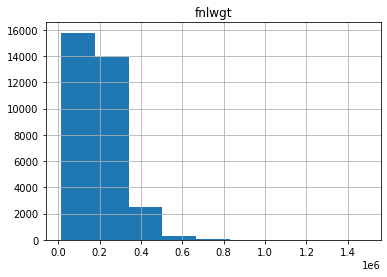

In [ ]:
# Scrie solutia ta aici
features = ["fnlwgt"]
data[features].hist(bins=9);

**Afiseaza diagrama de densitate pentru caracteristica *capital-gain* cu ajutorul metodei .plot() a dataframe-ului.**

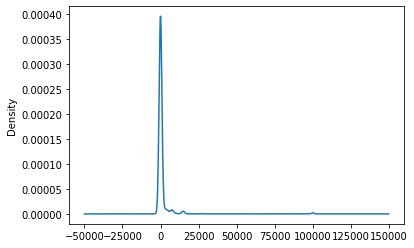

In [ ]:
data['capital-gain'].plot(
    kind="density", 
);

**Afiseaza diagrama box-plot pentru caracteristica *hours-per-week* cu ajutorul librariei seaborn (importata cu denumirea sns).**

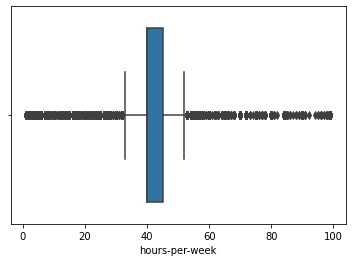

In [ ]:
import seaborn as sns

sns.boxplot(x="hours-per-week", data=data);

**Ce putem conclude despre caracteristica *hours-per-week*?**
Dublu click pe aceasta celula si scrie textul tau aici.


**Afiseaza diagrama de bare (bar plot) pentru caracteristicile *salary*, *marital-status* si *relationship*. Foloseste libraria matplotlib (importata cu numele plt). **

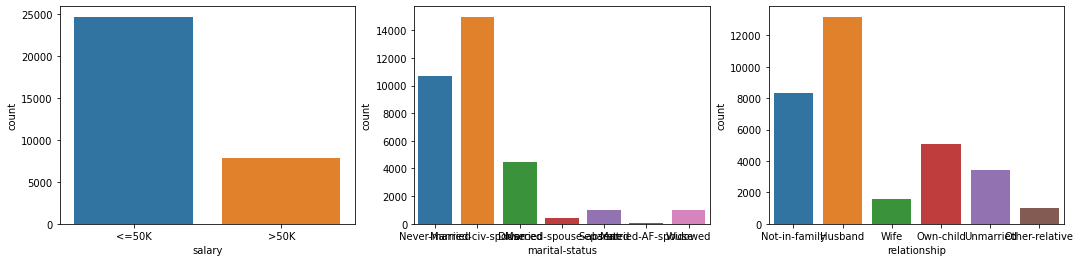

In [ ]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

sns.countplot(x="salary", data=data, ax=axes[0])
sns.countplot(x="marital-status", data=data, ax=axes[1])
sns.countplot(x="relationship", data=data, ax=axes[2]);

**Afiseaza matricea de corelatie intre caracteristicile numerice. Calculeaza matricea de colelatie cu ajutorul functiei *corr()* a dataframe-ului si afiseaza graficul cu ajutorul functiei *heatmap()* a librariei sns.**

In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


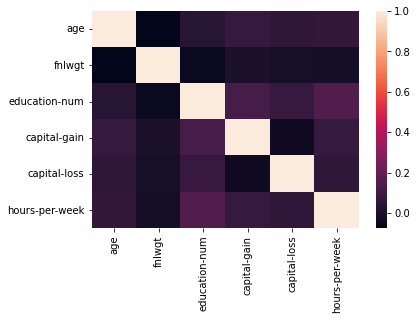

In [ ]:
# Drop non-numerical variables
numerical = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# Calculate and plot
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix);
